In [ ]:
import os
import nltk
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download("stopwords")

# Define stop words and punctuation
stop_words = set(stopwords.words("english"))
punctuation = set(string.punctuation)

# Directory containing national anthem translations
anthem_dir = "english_translation"

# Ensure the directory exists
if not os.path.exists(anthem_dir):
    raise FileNotFoundError(f"Directory '{anthem_dir}' not found. Check the path.")

# Get list of text files
anthem_files = [f for f in os.listdir(anthem_dir) if f.endswith('.txt')]

# Dictionary to store processed anthems
processed_anthems = {}

# Function to clean text (remove stop words & punctuation)
def preprocess_text(text):
    words = text.lower().split()  # Convert to lowercase & tokenize
    cleaned_words = [word.strip(string.punctuation) for word in words if word not in stop_words and word not in punctuation]
    return cleaned_words

# Process each anthem
for file in anthem_files:
    file_path = os.path.join(anthem_dir, file)
    
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()

    cleaned_words = preprocess_text(text)
    processed_anthems[file] = cleaned_words

# Aggregate all words for global analysis
all_words = [word for words in processed_anthems.values() for word in words]

# Calculate word frequency
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\onkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Word Frequency Distribution

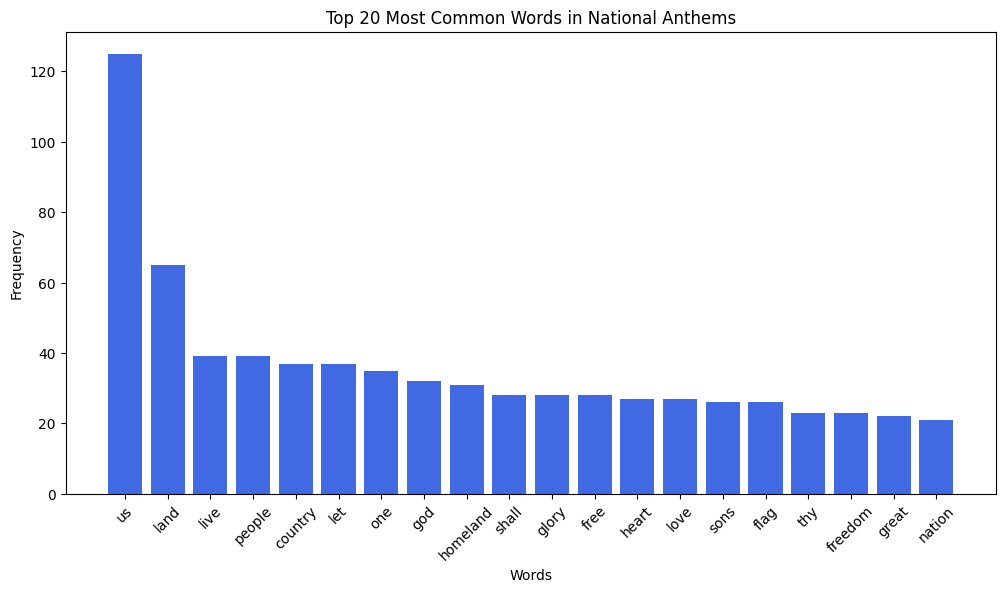

In [ ]:
plt.figure(figsize=(12, 6))
words, counts = zip(*most_common_words)
plt.bar(words, counts, color="royalblue")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in National Anthems")
plt.show()


## Word Cloud

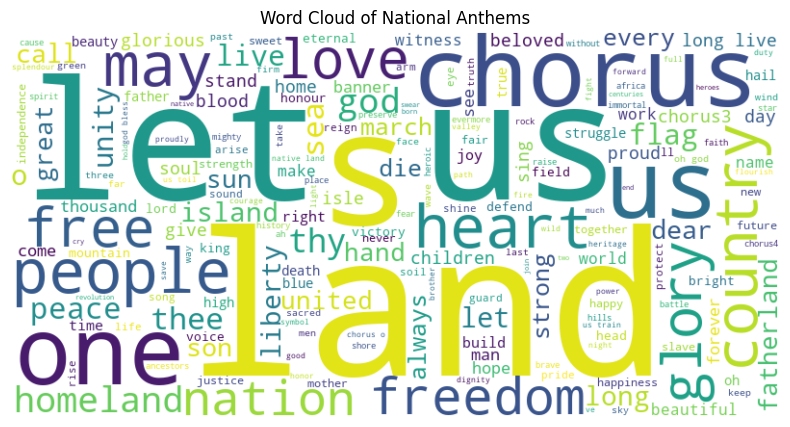

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of National Anthems")
plt.show()




## Unique Word Count per Anthem

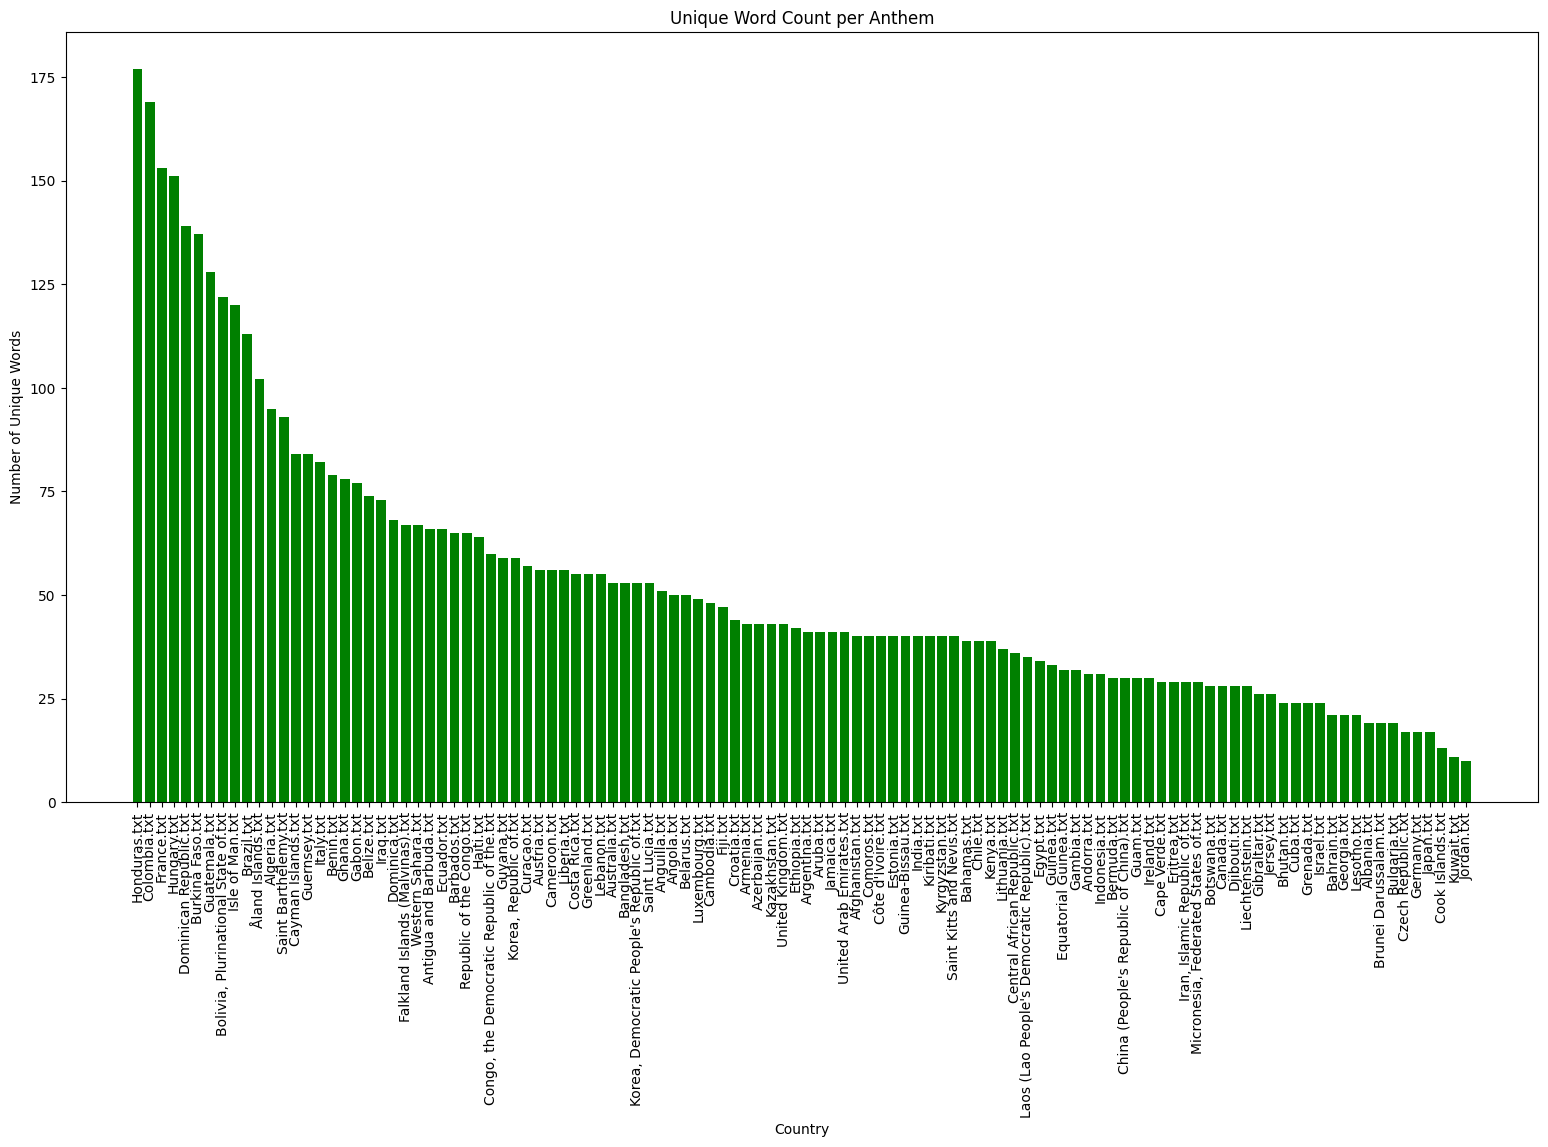

In [ ]:
unique_words_counts = {country: len(set(words)) for country, words in processed_anthems.items()}
sorted_countries = sorted(unique_words_counts.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(19, 10)) 
plt.bar([x[0] for x in sorted_countries], [x[1] for x in sorted_countries], color="green")
plt.ylabel("Number of Unique Words")
plt.xlabel("Country")
plt.title("Unique Word Count per Anthem")
plt.xticks(rotation=90) 
plt.show()



#  N-gram Analysis (Bigrams & Trigrams)

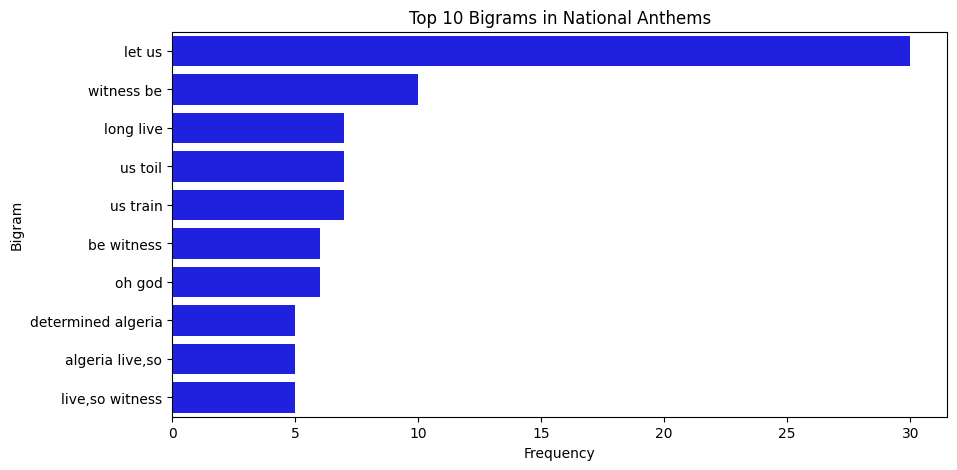

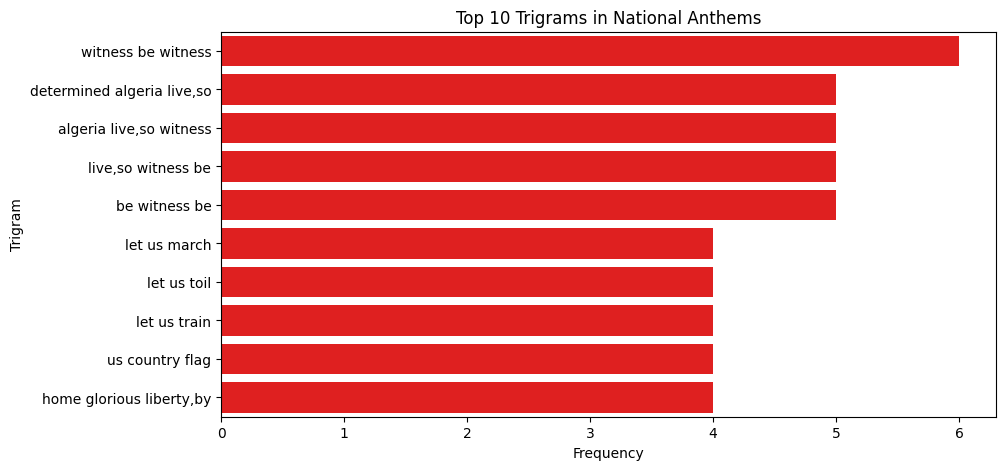

In [ ]:
import seaborn as sns
from nltk.util import ngrams

bigram_freq = Counter(ngrams(all_words, 2))
trigram_freq = Counter(ngrams(all_words, 3))

# Convert tuples to strings
bigram_freq = {(" ".join(k)): v for k, v in bigram_freq.most_common(10)}
trigram_freq = {(" ".join(k)): v for k, v in trigram_freq.most_common(10)}

# Plot Bigrams
plt.figure(figsize=(10, 5))
sns.barplot(x=list(bigram_freq.values()), y=list(bigram_freq.keys()), color="blue")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.title("Top 10 Bigrams in National Anthems")
plt.show()

# Plot Trigrams
plt.figure(figsize=(10, 5))
sns.barplot(x=list(trigram_freq.values()), y=list(trigram_freq.keys()), color="red")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.title("Top 10 Trigrams in National Anthems")
plt.show()